In [14]:
import sys
import numpy as np
import pyccl as ccl
sys.path.append('.')
import cosmography as cg
import matplotlib.pyplot as plt

In [25]:
sixdF = cg.Sixdf()
BOSS = cg.BOSSDR12()
eBOSS = cg.eBOSSDR16()
Vipers = cg.Vipers()
Wigglez = cg.Wigglez()

In [27]:
gp_z = np.linspace(0, 3, 101)
z_fine = np.linspace(0, 3, 201)
z_super_fine = np.linspace(0, 3, 301)
fid_cosmo = ccl.CosmologyVanillaLCDM()
LCDM_Dz = ccl.growth_factor(fid_cosmo, 1/(1+gp_z))
LCDM_fs8 = 0.81 * ccl.growth_factor(fid_cosmo, 1/(1+gp_z))*ccl.growth_rate(fid_cosmo, 1/(1+gp_z))

In [28]:
def to_err(cov):
    return np.sqrt(np.diag(cov))

(0.0, 2.7)

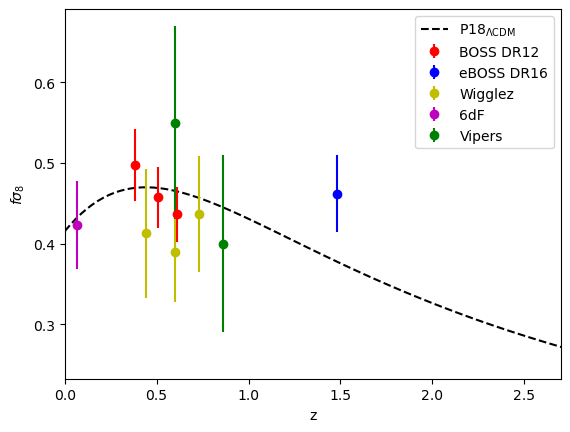

In [29]:
plt.plot(gp_z, LCDM_fs8, 'k--', label=r"P18$_{\Lambda\rm{CDM}}$")
plt.errorbar(BOSS.z, BOSS.data[6:9], yerr=to_err(BOSS.cov)[6:9], fmt='ro', label="BOSS DR12")
plt.errorbar(eBOSS.z, eBOSS.data[-1], yerr=to_err(eBOSS.cov)[-1], fmt='bo', label="eBOSS DR16")
plt.errorbar(Wigglez.z, Wigglez.data, yerr=to_err(Wigglez.cov), fmt='yo', label="Wigglez")
plt.errorbar(sixdF.z, sixdF.data, yerr=to_err(sixdF.cov), fmt='mo', label="6dF")
plt.errorbar(Vipers.z, Vipers.data, yerr=to_err(Vipers.cov), fmt='go', label="Vipers")
#plt.plot(zs_fid, fs8_m, "b-", label="prior")
#plt.fill_between(zs_fid, fs8_m + fs8_s, fs8_m - fs8_s, color="b", alpha=.3)
plt.legend()
plt.ylabel(r"$f \sigma_8$")
plt.xlabel("z")
plt.xlim(0, 2.7)